In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


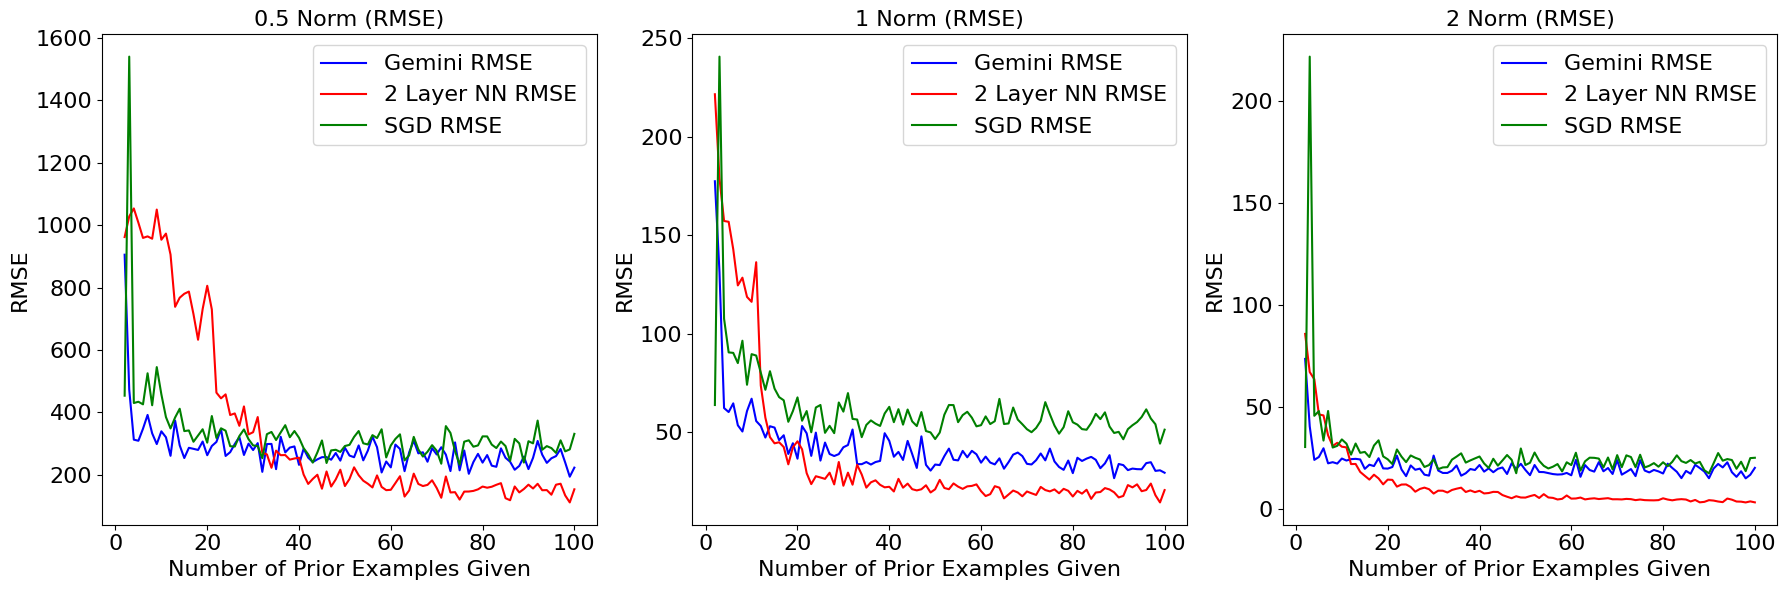

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

font_size = 16  

x_100 = range(2, 101)

# 0.5 Norm plot (left)
LLM_p05_norm = pd.read_csv('0.5_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_0.5_average_results.csv')
y = LLM_p05_norm['average_rmse']
sns.lineplot(ax=axs[0], x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_p05_norm = pd.read_csv('0.5_Norm_Results/NN_Results/2NN_df_average_results_vector_0.5P_norm.csv')
y = NN_p05_norm['average_rmse']
sns.lineplot(ax=axs[0], x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_p05_norm = pd.read_csv('0.5_Norm_Results/SGD_Results/SGD_df_average_results_vector_0.5_P_norm.csv')
y = SGD_p05_norm['average_rmse']
sns.lineplot(ax=axs[0], x=x_100, y=y, color='green', label='SGD RMSE')

axs[0].set_xlabel('Number of Prior Examples Given', fontsize=font_size)
axs[0].set_ylabel('RMSE', fontsize=font_size)
axs[0].set_title('0.5 Norm (RMSE)', fontsize=font_size)
axs[0].legend(loc='upper right', fontsize=font_size)

axs[0].tick_params(axis='both', which='major', labelsize=font_size)

# 1 Norm plot (middle)
LLM_p1_norm = pd.read_csv('1_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_1_average_results.csv')
y = LLM_p1_norm['average_rmse']
sns.lineplot(ax=axs[1], x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_p1_norm = pd.read_csv('1_Norm_Results/NN_Results/2NN_df_average_results_vector_P1_norm.csv')
y = NN_p1_norm['average_rmse']
sns.lineplot(ax=axs[1], x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_p1_norm = pd.read_csv('1_Norm_Results/SGD_Results/SGD_df_average_results_vector_P1_norm.csv')
y = SGD_p1_norm['average_rmse']
sns.lineplot(ax=axs[1], x=x_100, y=y, color='green', label='SGD RMSE')

axs[1].set_xlabel('Number of Prior Examples Given', fontsize=font_size)
axs[1].set_ylabel('RMSE', fontsize=font_size)
axs[1].set_title('1 Norm (RMSE)', fontsize=font_size)
axs[1].legend(loc='upper right', fontsize=font_size)

axs[1].tick_params(axis='both', which='major', labelsize=font_size)

# 2 Norm plot (right)
LLM_p2_norm = pd.read_csv('2_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_2_average_results.csv')
y = LLM_p2_norm['average_rmse']
sns.lineplot(ax=axs[2], x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_p2_norm = pd.read_csv('2_Norm_Results/NN_Results/2NN_df_average_results_vector_2P_norm.csv')
y = NN_p2_norm['average_rmse']
sns.lineplot(ax=axs[2], x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_p2_norm = pd.read_csv('2_Norm_Results/SGD_Results/SGD_df_average_results_vector_2_P_norm.csv')
y = SGD_p2_norm['average_rmse']
sns.lineplot(ax=axs[2], x=x_100, y=y, color='green', label='SGD RMSE')

axs[2].set_xlabel('Number of Prior Examples Given', fontsize=font_size)
axs[2].set_ylabel('RMSE', fontsize=font_size)
axs[2].set_title('2 Norm (RMSE)', fontsize=font_size)
axs[2].legend(loc='upper right', fontsize=font_size)

axs[2].tick_params(axis='both', which='major', labelsize=font_size)

plt.tight_layout()
plt.savefig('RMSE_Norms_All_Models_Combined_LargeFont.pdf', format='pdf', dpi=100)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Randomly select 4 experiments
random_experiments = random.sample(range(len(actual_17_Demonstrations)), 3)

fig, ax = plt.subplots(figsize=(12, 6))

categories = ['Actual', 'LLM', '2 Layer', 'SGD']
colors = ['black', 'blue', 'red', 'green']
num_categories = len(categories)

bar_width = 0.2
x_indexes = np.arange(len(random_experiments)) 

for i, (category, color) in enumerate(zip(categories, colors)):

    values = [
        np.mean(actual_17_Demonstrations[exp]) if category == 'Actual' else
        np.mean(LLM_17_Demonstrations[exp]) if category == 'LLM' else
        np.mean(two_layer_Demonstrations[exp]) if category == '2 Layer' else
        np.mean(SGD_17_Demonstrations[exp])
        for exp in random_experiments
    ]
    
    bar_positions = x_indexes + i * bar_width
    bars = ax.bar(bar_positions, values, width=bar_width, label=category, color=color, alpha=0.6)
    
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),  
            f'{value:.2f}',  
            ha='center', va='bottom', fontsize=9  
        )

ax.set_xticks(x_indexes + bar_width * (num_categories - 1) / 2)
ax.set_xticklabels([f'Experiment {exp+1}' for exp in random_experiments])

ax.set_xlabel('Experiments')
ax.set_ylabel('P1 Norm')
ax.set_title('Comparison of P1 Norms for Random Experiments')
ax.legend()

plt.tight_layout()
#plt.savefig('grouped_bar_chart_with_values.pdf', format='pdf', dpi=100)
plt.show()


/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


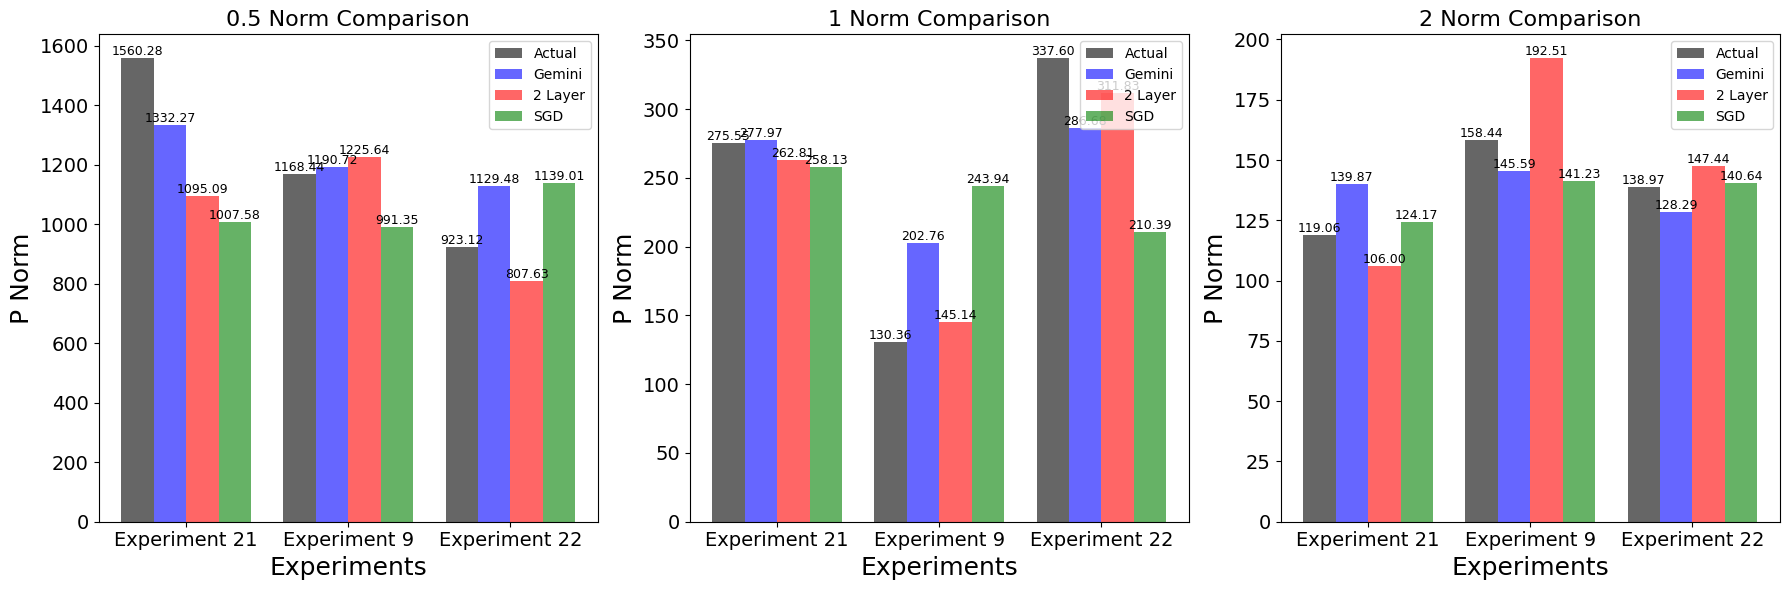

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

categories = ['Actual', 'Gemini', '2 Layer', 'SGD']
colors = ['black', 'blue', 'red', 'green']

def process_norm_data(LLM_file, two_layer_file, SGD_file):
    LLM_Every_Experiment = pd.read_csv(LLM_file)
    two_layer_every_experiment = pd.read_csv(two_layer_file)
    SGD_every_experiment = pd.read_csv(SGD_file)

    actual_17_Demonstrations = []
    LLM_17_Demonstrations = []
    two_layer_Demonstrations = []
    SGD_17_Demonstrations = []

    random_experiment = random.randint(2, 101)
 
    for i in range(2, 101):

        LLM_Predicted_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['predicted_answers']
        two_layer_predicted_list = two_layer_every_experiment[two_layer_every_experiment['i'] == i]['predicted_answers']
        SGD_predicted_list = SGD_every_experiment[SGD_every_experiment['i'] == i]['predicted_answers']
        Actual_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['actual_answers']

        if i == random_experiment: 
            LLM_17_Demonstrations = [float(j[1:-1]) for j in LLM_Predicted_List]

            actual_17_Demonstrations = [float(j[1:-1]) for j in Actual_List]

            two_layer_Demonstrations = [float(j) for j in two_layer_predicted_list]

            SGD_17_Demonstrations = [float(j) for j in SGD_predicted_list]

    return {
        'actual': actual_17_Demonstrations,
        'Gemini': LLM_17_Demonstrations,
        'two_layer': two_layer_Demonstrations,
        'SGD': SGD_17_Demonstrations
    }

norm_files = {
    '0.5 Norm': {
        'Gemini': '0.5_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_0.5_experiment_results.csv',
        'two_layer': '0.5_Norm_Results/NN_Results/2NN_df_experiment_results_vector_0.5P_norm.csv',
        'SGD': '0.5_Norm_Results/SGD_Results/SGD_df_experiment_results_vector_0.5_P_norm.csv'
    },
    '1 Norm': {
        'Gemini': '1_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_1_experiment_results.csv',
        'two_layer': '1_Norm_Results/NN_Results/2NN_df_experiment_results_vector_P1_norm.csv',
        'SGD': '1_Norm_Results/SGD_Results/SGD_df_experiment_results_vector_P1_norm.csv'
    },
    '2 Norm': {
        'Gemini': '2_Norm_Results/LLM_Results/LLM_Final_results_P_Norm_2_experiment_results.csv',
        'two_layer': '2_Norm_Results/NN_Results/2NN_df_experiment_results_vector_2P_norm.csv',
        'SGD': '2_Norm_Results/SGD_Results/SGD_df_experiment_results_vector_2_P_norm.csv'
    }
}

norm_data = {norm: process_norm_data(files['Gemini'], files['two_layer'], files['SGD']) for norm, files in norm_files.items()}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

random_experiments = random.sample(range(50), 3)

for idx, (norm, data) in enumerate(norm_data.items()):
    x_indexes = np.arange(len(random_experiments))
    bar_width = 0.2

    for i, (category, color) in enumerate(zip(categories, colors)):
        values = [
            data['actual'][exp] if category == 'Actual' else
            data['Gemini'][exp] if category == 'Gemini' else
            data['two_layer'][exp] if category == '2 Layer' else
            data['SGD'][exp]
            for exp in random_experiments
        ]
        
        bar_positions = x_indexes + i * bar_width
        bars = axs[idx].bar(bar_positions, values, width=bar_width, label=category, color=color, alpha=0.6)
        
        for bar, value in zip(bars, values):
            axs[idx].text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{value:.2f}',
                ha='center', va='bottom', fontsize=9
            )
    
    axs[idx].set_title(f'{norm} Comparison', fontsize=16)
    axs[idx].set_xlabel('Experiments', fontsize=18)
    axs[idx].set_ylabel('P Norm', fontsize=18)
    
    axs[idx].legend(loc='upper right', fontsize=10)
    
    axs[idx].tick_params(axis='x', labelsize=14)
    axs[idx].tick_params(axis='y', labelsize=14)

    axs[idx].set_xticks(x_indexes + bar_width * (len(categories) - 1) / 2)
    axs[idx].set_xticklabels([f'Experiment {exp+1}' for exp in random_experiments])

plt.tight_layout()
plt.savefig('Combined_Norm_Bar_Charts_Larger_Font_Smaller_Legend.pdf', format='pdf', dpi=100)
plt.show()
